In [314]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2b.ok')

Assignment: proj2b
OK, version v1.13.11



# Project 2 Part B: Spam/Ham Classification
## Classifiers
### The assignment is due on Monday, April 27th at 11:59pm PST.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: Karthik Chandra

## This Assignment
In Project 2 Part A, you made an effort to understand the data through EDA, and did some basic feature engineering. You also built a Logistic Regression model to classify Spam/Ham emails. In Part B, you will learn how to evaluate the classifiers you built. You will also have the chance to improve your model by selecting more features.

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 15
Total | 37

## Setup

In [315]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [316]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

Using version already downloaded: Mon Apr 27 11:21:27 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Mon Apr 27 11:21:28 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


The following code is adapted from Part A of this project. You will be using it again in Part B.

In [317]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email']) 
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), array([0, 0, 0, 0, 0]))

Recall that you trained the following model in Part A.

In [318]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


## Evaluating Classifiers

The model you trained doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [319]:
zero_predictor_fp = 0
zero_predictor_fn = train["spam"].sum()
zero_predictor_fn

1918

In [320]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [321]:
zero_predictor_acc = (len(train) - train["spam"].sum()) / len(train)
zero_predictor_recall = 0
zero_predictor_acc

0.7447091707706642

In [322]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Explain why the number of false positives, number of false negatives, accuracy, and recall all turned out the way they did.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

In question 6 part (a) if we predict 0 for every email, we won't have any false positives because there will be no positive predictions. All emails are automatically classified as ham and none as spam. Thus, the number of false negatives will be the 
total number of spam emails as we predicted negative for all of them just as the numbr of true negatives will be equal to the number of ham emails.

In question 6 part (b) we are accurately classifying all ham emails and wrongly classifying all spam emails so the accuracy
will be the total number of emails classified correctly (number of ham emails) divided by the total number of emails. Recall measures the number of spam emails classified correctly and we no that this is 0 because we didn't classify any emails as spam.

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Part A. Do **NOT** use any `sklearn` functions.

**Note: In lecture we used the `sklearn` package to compute the rates. Here you should work through them using just the definitions to help build a deeper understanding.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [323]:
Y_train_hat = model.predict(X_train)

false_negative = sum((Y_train_hat - Y_train) == -1)
true_negative = len(Y_train_hat[Y_train_hat == 0]) - false_negative
false_positive = sum((Y_train_hat - Y_train) == 1)
true_positive = len(Y_train_hat[Y_train_hat == 1]) - false_positive

logistic_predictor_precision = true_positive / (true_positive + false_positive)
logistic_predictor_recall = true_positive / (true_positive + false_negative)
logistic_predictor_far = false_positive / (false_positive + true_negative)

logistic_predictor_precision, logistic_predictor_recall, logistic_predictor_far
false_positive, false_negative
logistic_predictor_recall

0.11418143899895725

In [324]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Part A?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

There are more false negatives (1699) than false positives (122). The LogisticRegression classifier will actually correctly classify some spam emails as opposed to not at all like the zero_predictor.

### Question 6f

1. Our logistic regression classifier got 75.8% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

1. The zero_predictor got about 74.47% prediction accuracy, so the logistic regression classifier is only slightly more accurate.
2. The word features we used may not be very prevalent in either ham or spam emails and thus may be bad indicators of whether a certain email is ham or spam because most emails won't have them at all. This is likely to bring our accuracy down.
3. I would prefer the LogisticRegression classifier because the goal is to be able to filter out spam emails. The zero_predictor filters out 0 spam emails (recall = 0) whereas the LogisticRegression classifier will at least filter out some spam emails (recall = ~11.42%). Also, it has a marginally higher prediction accuracy.

## Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 9).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

In [325]:
#Import training data.

train_data = pd.read_csv('data/train.csv').fillna('')
train, val = train_test_split(train_data, test_size = 0.1, random_state = 42)
Y_train = train['spam']

#Look at emails for possible common spam words.

email_text = train['email']
email_text[1]

'URL: http://scriptingnews.userland.com/backissues/2002/09/25#When:8:33:10AM\n Date: Wed, 25 Sep 2002 15:33:10 GMT\n \n Wired[1]: "Stronger ties between ISPs and file-trading companies could bolster \n Kazaa\'s defenses."\n \n [1] http://www.wired.com/news/mp3/0,1285,55356,00.html\n \n \n'

(0, 1.0)

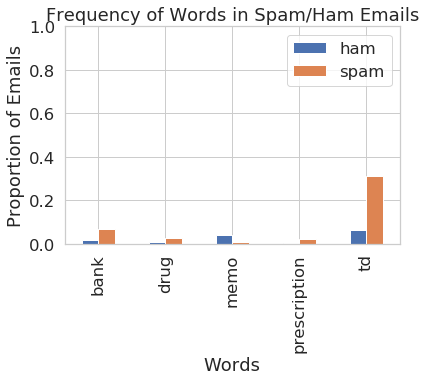

In [326]:
train=train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts


# Using code from proj 2a to test different words and their prevalence 
words = ['drug', 'bank', 'prescription', 'memo', 'td'] 
num_spam = train["spam"].sum()
num_ham = len(train["spam"]) - train['spam'].sum()

text = train["email"]
indicator = words_in_texts(words, text)
df = pd.DataFrame(indicator, columns = words).assign(type = train["spam"].replace({0: "ham", 1: "spam"}))
melted = df.melt("type").groupby(["variable", "type"]).sum().unstack()
melted = melted["value"].assign(ham = melted["value"]["ham"] / num_ham, 
                                spam = melted["value"]["spam"] / num_spam)
melted.plot(kind = "bar")
plt.legend(["ham", "spam"])
plt.xlabel("Words")
plt.ylabel("Proportion of Emails")
plt.title("Frequency of Words in Spam/Ham Emails")
plt.ylim(0, 1.0)

In [327]:
# List of possible common spam words.
spam_words = ["affordable", "bonus", "free", "html", "buy", "money", "cash", "win", "winner",
              "$", "your", "lowest", "price", "act", "cancel", "income", "boss", "take", "action",
              "all", "natural", "click", "here", "pay", "paid", "congratulations", "deal", "expires",
              "please", "delete", "hesitate", "urgent", "best", "yours", "limited", "while",
              "supplies", "last", "guarantee", "guaranteed", "we", "our", "ours", "cheap", "discount",
              "will", "be", "amazed", "%", "billion", "million", "thousand", "gift", "clearence", "increase",
              "business", "sales", "expire", "dear", "consumers", "head", "url", "you", "rather", "methods",
              "only", "earnings", "get", "back", "ultimate",
              "casino", "own", "credit", "card", "check", "apply", "debt", "beneficiary", "luxury", "promise",
              "instant", "fast", "rates", "low", "offer", "offers", "purchase", "investment", "earn", "collect",
              "more", "access", "certified", "refund", "traffic", "success", "order", "unlimited", "billing",
              "double", "lose", "satisfaction", "quote", "experience", "terms", "weight",
              "!", "3d", "size", "font", "&", "td", "text/html", "</p>", "</body>", "Content-Type",
             "<html>", "</html>","<body>", "<font>", "</font>"]

In [328]:
# Count the number of capitals letters per email

def count_capitals(emails):
    capital = []
    for email in emails:
        capital.append(sum(1 for letter in email if letter.isupper()))
    return capital

In [329]:
# Count the number of symbols (not letters of any case or numbers) per email

def symbols(emails):
    symbs = emails.str.findall("[^A-Za-z0-9]+")
    symbol = []
    for s in symbs:
        symbol.append(len(s))
    return symbol

In [330]:
# Check whether the email is a reply

def replies(emails):
    rep = []
    for email in emails:
        if 'Re:' in email:
            rep.append(1)
        else:
            rep.append(0)
    return rep

In [331]:
# Check whether the email is a forwarded one

def forwards(emails):
    forw = []
    for email in emails:
        if 'Fw:' in email:
            forw.append(1)
        else:
            forw.append(0)
    return forw

In [332]:
import re
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

count_cap = count_capitals(train['email'])
count_sym = symbols(train['email'])
count_rep = replies(train['subject'])
count_for = forwards(train['subject'])

spam = words_in_texts(spam_words, email_text)

X_train_df = pd.DataFrame(spam).assign(capitals = count_cap, symbols = count_sym, reply = count_rep, forward = count_for)

In [333]:
# Compute the cross validation error, similar to lab 7 work but adding accuracy

model = LogisticRegression()

def compute_cv_error(model, X_train, Y_train):
    
    kf = KFold(n_splits = 5)
    validation_errors = []
    validation_accuracies = []
    
    for train_idx, valid_idx in kf.split(X_train):
        
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]
        
        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        Y_prediction = model.predict(split_X_valid)
        
        # Compute the RMSE on the validation split
        error = log_loss(Y_prediction, split_Y_valid, labels = [0,1])
        accuracy = accuracy_score(split_Y_valid, Y_prediction, normalize = True)
        
        validation_errors.append(error)
        validation_accuracies.append(accuracy)
        
    print("cross-validation error:", np.mean(validation_errors))
    print("cross-validation accuracy:", np.mean(validation_accuracies))
    
    return np.mean(validation_errors), np.mean(validation_accuracies)

compute_cv_error(model, X_train_df, Y_train)

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

cross-validation error: 2.5285451268119945
cross-validation accuracy: 0.9267923097435844


/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(2.5285451268119945, 0.9267923097435844)

In [334]:
model.fit(X_train_df, Y_train)
accuracy_score(Y_train, model.predict(X_train_df))

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9365100492479702

### Question 7: Feature/Model Selection Process

In the following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

1. Generally, I read through the emails (very inefficient) to identify similar trends, and the most prominent one was that spam emails had a lot of html tags. For the words I used some code from project 2a to check the frequency of certain words in the emails. I tried to include pieces of html in addition to normal words because those seemed to be very prevalent in spam emails and not very prevalent in ham emails. I also tried different features in X_train_df and regenerated the accuracy score to see if it increased or decreased. Eventually I had to cut down due to overfitting. Also, I relied a lot on the given set of possibly useful features to help me.
2. I tried html tags and also '!' instead of only actual words in the list of spam_words. This really improved my model. I also tried to look at not just the body of the email but also the subject. Emails that were replies or forwarded were mostly ham emails so that also helped improve the model. Features I tried that lowered the accuracy were the length of emails in word count (I thought spam emails were generally much longer than ham emails but it turned out that this was not always the case) and the subject length in words (I thought they would be shorter/not there for spam emails but it did not help the accuracy of my model).
3. I was surprised that spam subjects did not have 'Fw:' because I had thought that many spam emails are forwarded to people. I was also surprised that ham emails contained more capital letters than spam emails because the convention in formal email writing is to capitalise only certain words but in spam emails words are often capitalised to grab the attention of reasons, similar to how '!' was a lot more common in spam emails.

### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include

1. A plot showing something meaningful about the data that helped you during feature selection, model selection, or both.
2. Two or three sentences describing what you plotted and its implications with respect to your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

Text(0, 0.5, 'correlation')

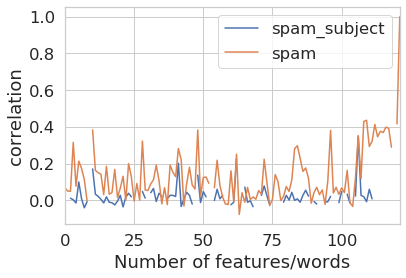

In [335]:
# Write your description (2-3 sentences) as a comment here:
# I wanted to see if I should use spam_words on subjects or just emails. I made this plot of correlation against number
# of words/features to determine whether or not the correlation of subjects to the words was higher than of emails to
# the words. It's clear that the correlation is higher for emails themselves so I did not end up using words to predict
# ham/spam on the basis of subject bodies in my model model as it did not really impact accuracy.

# Write the code to generate your visualization here:

import seaborn as sns

spam_new = words_in_texts(spam_words, train["email"])
spam_subject = words_in_texts(spam_words, train["subject"])

dfs = pd.DataFrame(spam_subject)
dfs["spam_subject"] = train["spam"]
dfs.corr()["spam_subject"].plot()

df = pd.DataFrame(spam_new)
df["spam"] = train["spam"]
df.corr()["spam"].plot()

plt.legend()
plt.xlabel("Number of features/words")
plt.ylabel("correlation")

# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
# plt.show()

# Question 9: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/c76d80f7d3204159865a324ec2936f18

**Note: You may submit up to 4 times a day. If you have submitted 4 times on a day, you will need to wait until the next day for more submissions.**

Note that this question is graded on an absolute scale based on the accuracy your model achieves on the test set and the score does not depend on your ranking on Kaggle. 

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q9
points: 15
-->

In [336]:
test_data = pd.read_csv('data/test.csv').fillna('')

email_text = test_data['email']

count_cap = count_capitals(test_data['email'])
count_sym = symbols(test_data['email'])
count_rep = replies(test_data['subject'])
count_for = forwards(test_data['subject'])

spam = words_in_texts(spam_words, email_text)

X_test_df = pd.DataFrame(spam).assign(capitals = count_cap, symbols = count_sym, reply = count_rep, forward = count_for)

test_predictions = model.predict(X_test_df)

In [337]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [267]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-04-27T18:31:57.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2b.ipynb', 'proj2b.pdf')
ok.submit()

Generating PDF...
Saved proj2b.pdf


<IPython.core.display.Javascript object>